In [51]:
! pip install tldextract

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import defaultdict,Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from tldextract import extract
import re

In [53]:
#nltk libraries
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
train_df = pd.read_csv('/content/train.csv', encoding = 'ISO-8859-1')
test_df = pd.read_csv('/content/test.csv', encoding = 'ISO-8859-1')

Take a look into number of columns and rows of dataset

In [55]:
print('The shape of training dataset is = {}'.format(train_df.shape))
print('The shape of testing dataset is = {}'.format(test_df.shape))

The shape of training dataset is = (1157, 9)
The shape of testing dataset is = (571, 10)


Exploring the training and testing datasets

In [56]:
#info of training dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Source           1157 non-null   object
 1   Host             1098 non-null   object
 2   Link             1157 non-null   object
 3   Date(ET)         1157 non-null   object
 4   Time(ET)         1157 non-null   object
 5   time(GMT)        996 non-null    object
 6   Title            941 non-null    object
 7   TRANS_CONV_TEXT  1156 non-null   object
 8   Patient_Tag      1157 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 81.5+ KB


In [57]:
#info of testing dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Index            571 non-null    int64 
 1   Source           571 non-null    object
 2   Host             541 non-null    object
 3   Link             571 non-null    object
 4   Date(ET)         571 non-null    object
 5   Time(ET)         571 non-null    object
 6   time(GMT)        480 non-null    object
 7   Title            454 non-null    object
 8   TRANS_CONV_TEXT  571 non-null    object
 9   Unnamed: 9       1 non-null      object
dtypes: int64(1), object(9)
memory usage: 44.7+ KB


Drop the duplicate values in training dataset

In [58]:
train_df = train_df.drop_duplicates()
train_df.shape

(1157, 9)

Check one last column of testing dataframe 'Unnamed: 9', because as per above test dataset info, it has only 1 non null count, and it won't be adding any information, so there is no harm in dropping it. Also check out the index in test_df, it just showing the index number in test dataset, as of now we will remove it. 

In [59]:
print(test_df[['Unnamed: 9']].head())
test_df.drop(columns = ['Index','Unnamed: 9'],inplace = True)
test_df.head()

  Unnamed: 9
0        NaN
1        NaN
2        NaN
3        NaN
4        NaN


,Source,Host,Link,Date(ET),Time(ET),time(GMT),Title,TRANS_CONV_TEXT
0,BLOG,uhmagonline.com,http://uhmagonline.com/son-of-the-late-kimbo-s...,7/30/2016,0:41:23,NaN,NaN,"Baby Slice, the son of the late Kimbo Slice, h..."
1,FORUMS,implantinformationnetwork.yuku.com,http://implantinformationnetwork.yuku.com/topi...,6/20/2016,0:07:30,6/20/2016 9:37,My Story --,"<p><font face=""sans-serif"" size=""3"">I have had..."
2,BLOG,http://cestlapharm.blogspot.com,http://cestlapharm.blogspot.com/2016/06/us-fda...,6/15/2016,15:44:00,6/16/2016 1:14,US FDA ?????canagliflozin?dapagliflozin?????????,"Previously, sodium-glucose cotransporter-2 (SG..."
3,FORUMS,healthboards.com,http://www.healthboards.com/boards/heart-disor...,7/17/2016,19:41:00,NaN,NaN,Hello. I suffer from congestive heart failure ...
4,BLOG,http://www.sciencecodex.com,http://www.sciencecodex.com/vitamin_d_improves...,4/4/2016,15:30:45,4/5/2016 1:00,"Vitamin D improves heart function, study finds",A daily dose of vitamin D3 improves heart func...


In [60]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Source           571 non-null    object
 1   Host             541 non-null    object
 2   Link             571 non-null    object
 3   Date(ET)         571 non-null    object
 4   Time(ET)         571 non-null    object
 5   time(GMT)        480 non-null    object
 6   Title            454 non-null    object
 7   TRANS_CONV_TEXT  571 non-null    object
dtypes: object(8)
memory usage: 35.8+ KB


Now looking at NULL and NAN values, and before that we will add up train and test dataset and we will put a column named 'Patient_Tag' in test dataset and fill it with -1. 

In [61]:
test_df_1 = test_df.copy()
test_df_1['Patient_Tag'] = -1
df = pd.concat([train_df, test_df_1])

In [62]:
#Null values
null = df.isnull().sum().sort_values(ascending =True)
#percentage missing
percentage_missing = ((df.isnull().sum()/df.shape[0])*100).sort_values(ascending= False)
percentage_missing

Title              19.270833
time(GMT)          14.583333
Host                5.150463
TRANS_CONV_TEXT     0.057870
Patient_Tag         0.000000
Time(ET)            0.000000
Date(ET)            0.000000
Link                0.000000
Source              0.000000
dtype: float64

In [63]:
missing_data = pd.concat([null,percentage_missing],axis = 1,keys = ['Total missing', 'Percent missing'])
missing_data

,Total missing,Percent missing
Source,0,0.000000
Link,0,0.000000
Date(ET),0,0.000000
Time(ET),0,0.000000
Patient_Tag,0,0.000000
TRANS_CONV_TEXT,1,0.057870
Host,89,5.150463
time(GMT),252,14.583333
Title,333,19.270833


Lets check heatmap of NULL values. Also note that, one value of TRANS_CONV_TEXT is missing. 

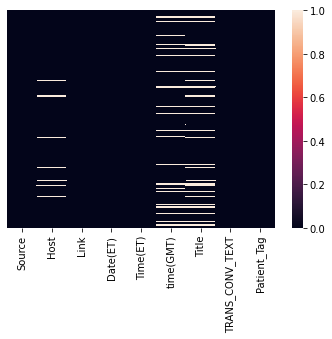

In [64]:
sns.heatmap(df.isnull(), yticklabels=False)

Checkout the Patient Tag

In [65]:
train_df.Patient_Tag.value_counts()

0    917
1    240
Name: Patient_Tag, dtype: int64

In [66]:
class_df = train_df.groupby('Patient_Tag').count()['TRANS_CONV_TEXT'].reset_index().sort_values(by = 'TRANS_CONV_TEXT', ascending = False)
class_df.style.background_gradient(cmap = 'winter')

,Patient_Tag,TRANS_CONV_TEXT
0,0,916
1,1,240


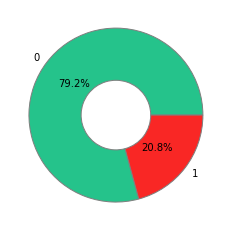

In [67]:
percent_class=class_df.TRANS_CONV_TEXT
labels= class_df.Patient_Tag

colors = ['#25C38B','#F92725']

pie,_,_ = plt.pie(percent_class,radius = 1.0,labels=labels,colors=colors,autopct="%.1f%%")
plt.setp(pie, width=0.6, edgecolor='grey') 
plt.show()

Let's explore the text data

First we will clean all the text data

In [68]:
def clean_text(x):
    normalizedsentense = x.lower()
    text = re.sub(r"[^a-z']+", ' ', normalizedsentense)
    return text
train_df['TRANS_CONV_TEXT']=train_df['TRANS_CONV_TEXT'].astype(str)
test_df['TRANS_CONV_TEXT']=test_df['TRANS_CONV_TEXT'].astype(str)
train_df['TRANS_CONV_TEXT']=train_df['TRANS_CONV_TEXT'].apply(lambda x:clean_text(x))
test_df['TRANS_CONV_TEXT']=test_df['TRANS_CONV_TEXT'].apply(lambda x:clean_text(x))

In [69]:
df['TRANS_CONV_TEXT']

0      I don't disagree with you in principle. I'm ju...
1      I am always dizzy I get dizzy standing up so I...
2      Axelle/Bauer-Griffin/FilmMagic(NEW YORK) -- Qu...
3      I am 17 and I have been throwing up for about ...
4      Quote: Originally Posted by Boyan Silyavski Wa...
                             ...                        
566    By Kathleen Doheny HealthDay Reporter TUESDAY,...
567    KYW Medical Reports Sponsored By Independence ...
568    Surprisingly, the increased risk of heart fail...
569    every morning i wake up and my kidneys are hur...
570    Hi, I'm new to this site so I will give a smal...
Name: TRANS_CONV_TEXT, Length: 1728, dtype: object

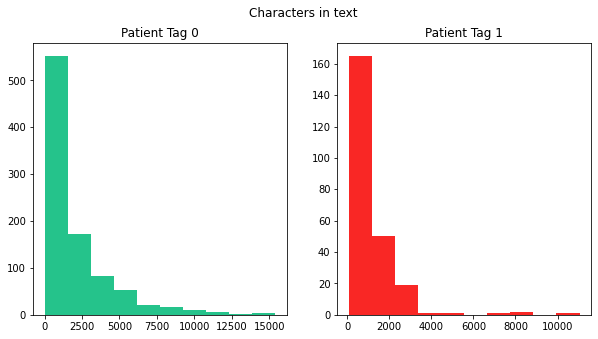

In [70]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

text_len=train_df[train_df['Patient_Tag']== 0]['TRANS_CONV_TEXT'].str.len()
ax1.hist(text_len,color='#25C38B')
ax1.set_title('Patient Tag 0')

text_len=train_df[train_df['Patient_Tag']== 1]['TRANS_CONV_TEXT'].str.len()
ax2.hist(text_len,color='#F92725')
ax2.set_title('Patient Tag 1')

fig.suptitle('Characters in text')
plt.show()

It can be seen from the graph that, the patient tag 0 does have, max length of text is upto 16000, whereas the patient tag 1 has max lenth of text is up to 12000

Let's check number of words in Text

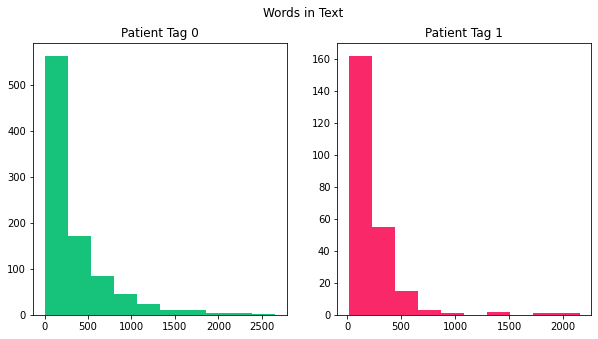

In [71]:
train_df_1 = train_df.copy()
train_df_1['text'] = train_df_1.TRANS_CONV_TEXT
train_df_1["text"] = train_df_1["text"].astype(str)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,5))

text_len=train_df_1[train_df_1['Patient_Tag']==0]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='#17C37B')
ax1.set_title('Patient Tag 0')

text_len=train_df_1[train_df_1['Patient_Tag']==1]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='#F92969')
ax2.set_title('Patient Tag 1')

fig.suptitle('Words in Text')
plt.show()

Let's check some most common words in text

In [72]:
def create_corpus(target):
    corpus=[]
    
    for x in train_df_1[train_df_1['Patient_Tag']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [73]:
#check stop words, and we will remove them while counting all other words
np.array(stop)

array({'the', 'through', 'further', 'under', "hadn't", 'about', 'ours', 'each', 'where', 'theirs', 'how', 'a', 'after', "mustn't", 'because', 'ain', 'when', 'that', 'at', 'don', 'm', 'won', 'are', 'its', 'her', 'is', 'it', 'o', 'having', 'who', 'out', 'did', 'i', "don't", "won't", 'itself', 'them', 'there', 'most', 'hers', 'such', 'be', 'not', 'hadn', 's', 'this', 'then', 'for', 'y', 'ma', 'very', 'no', "needn't", 'doing', 'just', "isn't", 'which', 'over', 'needn', 'wouldn', "aren't", 'she', 'themselves', 'below', 'up', 'why', 'couldn', "wasn't", "she's", "haven't", "wouldn't", 'during', 'until', "you've", 'what', 'or', 'of', 'an', 've', "you're", 'your', 't', 'myself', "hasn't", 're', 'aren', 'if', 'other', "shan't", 'and', 'shouldn', 'himself', 'few', 'weren', 'while', 'so', 'as', 'too', "it's", 'on', 'all', 'll', 'my', 'doesn', 'any', 'they', 'shan', 'being', 'with', 'some', 'again', 'he', 'once', 'mustn', 'yourself', 'both', 'same', 'do', 'does', "you'd", "shouldn't", 'mightn', 'we

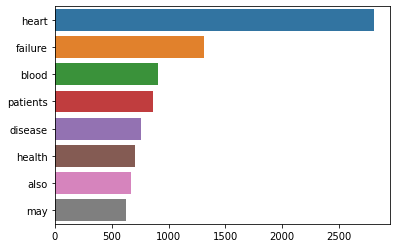

In [74]:
corpus=create_corpus(0)
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:50]:
    if (word.lower() not in stop) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

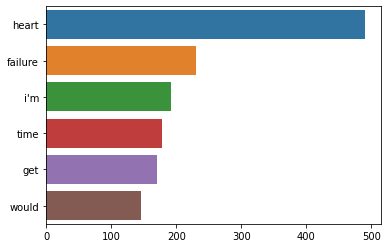

In [75]:
corpus=create_corpus(1)
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:50]:
    if (word.lower() not in stop) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

It seems it's all about heart, blood, failure and risks. : -p

Let's make some word cloud

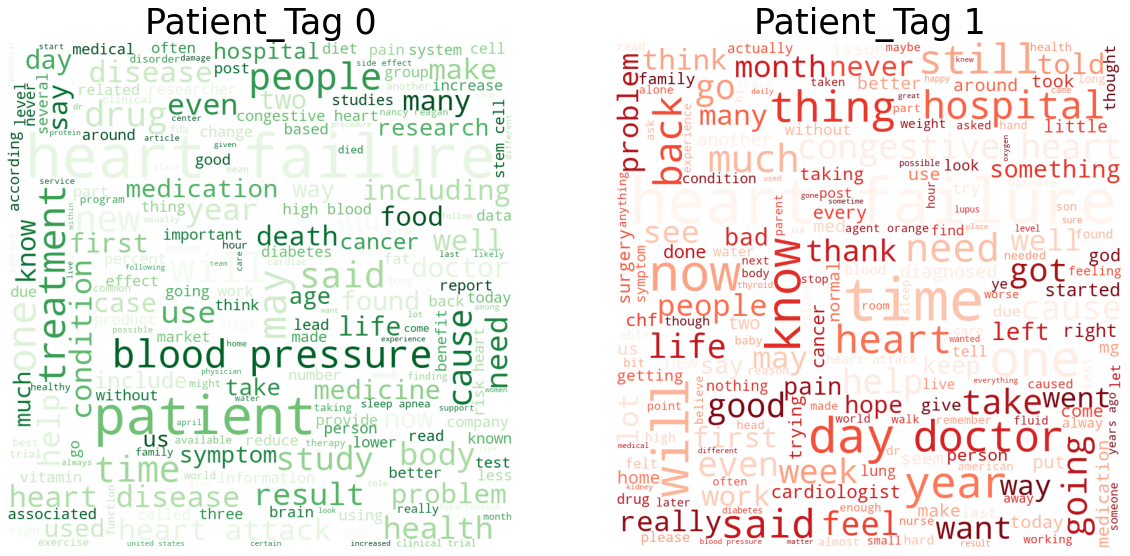

In [76]:
train_df_2 = train_df.copy()
train_df_2['text'] = train_df_2.TRANS_CONV_TEXT
train_df_2["text"] = train_df_2["text"].astype(str)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[20, 10])

train_df_2_0 = train_df_2[train_df_2["Patient_Tag"]==0]
train_df_2_1 = train_df_2[train_df_2["Patient_Tag"]==1]


comment_words = '' 
stopwords = set(STOPWORDS) 

for val in train_df_2_0.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "

wordcloud1 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Greens",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Patient_Tag 0',fontsize=35);

comment_words = ''

for val in train_df_2_1.text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "



wordcloud2 = WordCloud(width = 800, height = 800, 
                background_color ='white',
                colormap="Reds",
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words)  
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Patient_Tag 1',fontsize=35);


Now let's explore, sources

In [77]:
train_df_3 = train_df.copy()
train_df_3['Source'].value_counts()

FORUMS      669
BLOG        385
Facebook     54
YOUTUBE      39
FACEBOOK     10
Name: Source, dtype: int64

In [78]:
test_df['Source'].value_counts()

FORUMS      331
BLOG        189
Facebook     28
YOUTUBE      17
FACEBOOK      6
Name: Source, dtype: int64

Make Facebook and FECEBOOK both are same in both train and test dataset

In [79]:
def classes_def(x):
    if x ==  "FACEBOOK":
        return "Facebook"
    elif x == 'FORUMS':
        return 'Forums'
    elif x == 'BLOG':
        return 'Blog'
    elif x == 'YOUTUBE':
        return 'Youtube'
    else:
        return 'Facebook'
train_df['Source']=train_df['Source'].apply(lambda x:classes_def(x))
test_df['Source']=test_df['Source'].apply(lambda x:classes_def(x))

In [80]:
source_data = train_df['Source'].value_counts()
source_data

Forums      669
Blog        385
Facebook     64
Youtube      39
Name: Source, dtype: int64

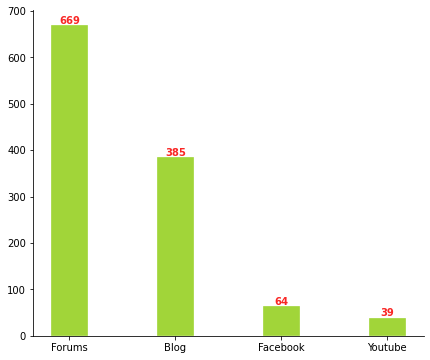

In [81]:
fig, ax = plt.subplots(1,1, figsize=(7, 6))
source_data = train_df['Source'].value_counts()
ax.bar(source_data.index, source_data, width = 0.35, edgecolor = 'white',linewidth=0.3,color = '#A1D539')
for i in source_data.index:
    ax.annotate(f"{source_data[i]}", 
                   xy=(i, source_data[i] +10),
                   va = 'center', ha='center',fontweight='heavy', fontfamily='roman',
                   color='#F92725')
    
for s in ['top','right']:
    ax.spines[s].set_visible(False)

Now look at the hosts

As we saw earlier, there are null values in host but there are no null values in link. So we will copy the link directly and extract the host name where, there is null value in host, we will do this in both train and test datasets

In [82]:
train_df["Host"].fillna(train_df["Link"], inplace=True)
test_df["Host"].fillna(test_df["Link"], inplace=True)

In [83]:
#extracts the url from the link, we will extract hostname only
def extract_url(x):
    tsd, td, tsu = extract(x) # prints abc, hostname, com
    return td

In [84]:
train_df['Host']=train_df['Host'].apply(lambda x:extract_url(x))
train_df['Host'].value_counts().sort_values(ascending= False)

blogspot               146
reddit                  77
facebook                64
youtube                 39
patient                 21
                      ... 
bhcourier                1
siasat                   1
yourkit                  1
newsok                   1
propertymentorgroup      1
Name: Host, Length: 402, dtype: int64

We see there is one entry with 65 values is an empty string, if we check in the data, they are from the host Youtube. So we will manually put the host name youtube.

In [85]:
test_df['Host']=test_df['Host'].apply(lambda x:extract_url(x))
test_df['Host'].value_counts().sort_values(ascending= False)

blogspot           76
reddit             47
facebook           34
icdsupportgroup    18
youtube            17
                   ..
wikinewforum        1
fightaging          1
erodzina            1
nn                  1
bcnn2               1
Name: Host, Length: 235, dtype: int64

In [86]:
#train_df['Host'] = train_df['Host'].apply(lambda 'unknown' : train_df[train_df['Host'] == '']
train_df.loc[train_df.Host == '' , 'Host'] = 'youtube'

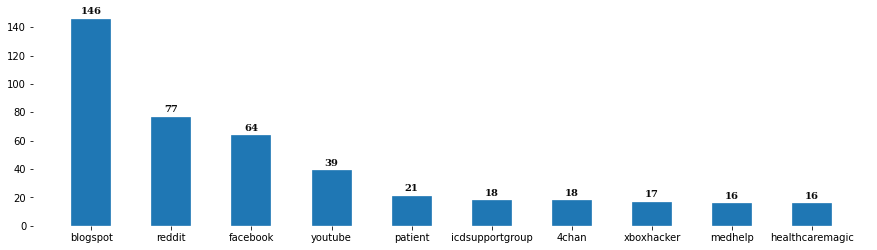

In [87]:
host = train_df['Host'].value_counts().nlargest(n=10)
fig, ax = plt.subplots(1,1, figsize=(15, 4))

ax.bar(host.index, host, width = 0.5, edgecolor = 'white',linewidth=0.3)
for i in host.index:
    ax.annotate(f"{host[i]}", 
                   xy=(i, host[i] + 5),
                   va = 'center', ha='center',fontweight='heavy', fontfamily='serif',
                   color='#0B0B0B')
    
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)

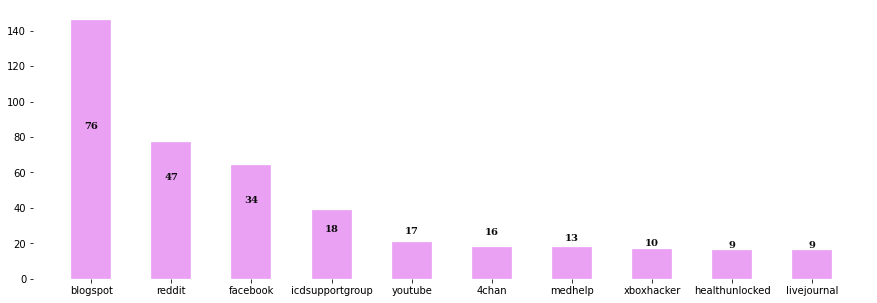

In [88]:
host_test = test_df['Host'].value_counts().nlargest(n=10)
fig, ax = plt.subplots(1,1, figsize=(15, 5))

ax.bar(host_test.index, host, width = 0.5, edgecolor = 'white',linewidth=0.3, color = '#EAA1F4')
for i in host_test.index:
    ax.annotate(f"{host_test[i]}", 
                   xy=(i, host_test[i] + 10),
                   va = 'center', ha='center',fontweight='heavy', fontfamily='serif',
                   color='#0B0B0B')
    
for s in ['top','left','right','bottom']:
    ax.spines[s].set_visible(False)

Also, there is no meaning to keep links in data, as we already keep host name in the dataset. Keeping URL  will not add any difference. 

In [89]:
train_df = train_df.drop(['Link'], axis=1)
test_df = test_df.drop(['Link'],axis = 1)

Now look at date and time

The Eastern Time Zone (ET) is an area 5 hours behind Greenwich Mean Time (GMT-5) during the winter months (referred to as Eastern Standard Time or EST) and 4 hours behind Greenwich Mean Time (GMT-4) during the summer months (referred to as Eastern Daylight Time or EDT).

In [90]:
date_time = train_df[['Date(ET)','Time(ET)','time(GMT)']]
date_time

,Date(ET),Time(ET),time(GMT)
0,6/15/2016,13:58:00,6/15/2016 23:28
1,5/7/2016,0.820833333,42498.21667
2,4/14/2016,15:00:38,4/15/2016 0:30
3,6/18/2016,20:46:00,6/19/2016 6:16
4,6/15/2016,3:26:00,6/15/2016 12:56
...,...,...,...
1152,4/26/2016,16:30:01,4/27/2016 2:00
1153,7/20/2016,11:25:11,Ted Rogers Centre for Heart Research
1154,2/10/2016,0.471527778,42410.67986
1155,7/14/2016,5:16:06,NaN


As it can be seen that, ET is 5 hours behind than GMT. Both columns Time(ET) and time(GMT) finally gives a time, which is same. There is no meaning to keep both columns, so we will remove one time(GMT) column. Another reason to remove time(GMT) is, it has 252 missing values.

In [91]:
train_df = train_df.drop(['time(GMT)'], axis=1)
test_df = test_df.drop(['time(GMT)'],axis = 1)

In [92]:
#train_df['Date(ET)'] =  pd.to_datetime(train_df['Date(ET)'],format='%dd-%mm-%yyyy')
train_df['Date(ET)'] = pd.to_datetime(train_df['Date(ET)'])

In [93]:
train_df['Time(ET)'] = pd.to_datetime(train_df['Time(ET)'],errors='coerce').dt.time
test_df['Time(ET)'] = pd.to_datetime(test_df['Time(ET)'],errors='coerce').dt.time

Due to COERCE, where there is time like 0.87 or 0.47 it will be converted to NAT and we will put the median time on their place. 

In [94]:
test_df['Time(ET)'].isna().sum()

39

In [95]:
train_df['Time(ET)'].isna().sum()

72

In [96]:
temp_train_df = train_df.dropna()
temp_test_df = test_df.dropna()

At the end we can add one more feature according to time and date. 

In [97]:
temp_train_df.loc[:,'hour'] = pd.to_datetime(temp_train_df['Time(ET)'], format='%H:%M:%S')
temp_train_df.loc[:,'hour'] = temp_train_df['hour'].dt.hour

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [98]:
prods = pd.DataFrame({'hour':range(1, 25)})
b = [0,4,8,12,16,20,24]
l = ['Late Night', 'Early Morning','Morning','Noon','Eve','Night']
prods['session'] = pd.cut(prods['hour'], bins=b, labels=l, include_lowest=True)
def f(x):
    if (x > 6) and (x <= 12):
        return 'Morning'
    elif (x > 12) and (x <= 18 ):
        return 'Noon'
    elif (x > 18) and (x <= 24):
        return'Evening'
    elif (x > 0) and (x <= 6) :
        return 'Night'
temp_train_df['hour'] = temp_train_df['hour'].apply(f)
temp_train_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Source,Host,Date(ET),Time(ET),Title,TRANS_CONV_TEXT,Patient_Tag,hour
0,Forums,cafepharma,2016-06-15,13:58:00,Epstein,i don't disagree with you in principle i'm jus...,0,Noon
2,Blog,abcnewsradioonline,2016-04-14,15:00:38,Queen Latifah Joins American Heart Association...,axelle bauer griffin filmmagic new york queen ...,0,Noon
3,Forums,cancer-forums,2016-06-18,20:46:00,Bulaemia,i am and i have been throwing up for about a y...,1,Evening
4,Forums,diyaudio,2016-06-15,03:26:00,DIY Silver interconnects and RCAs???,quote originally posted by boyan silyavski wak...,0,Night
5,Forums,cyclinguk,2016-04-06,05:50:00,Personal Question,theres a discussion about recumbent power on b...,0,Night


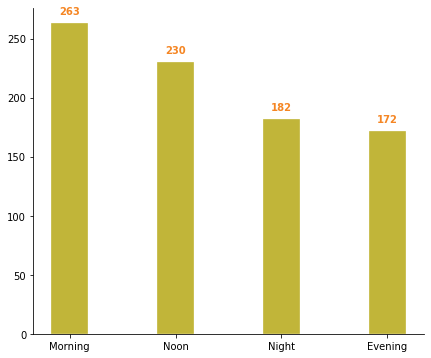

In [99]:
fig, ax = plt.subplots(1,1, figsize=(7, 6))
hourly_data = temp_train_df['hour'].value_counts()
ax.bar(hourly_data.index, hourly_data, width = 0.35, edgecolor = 'white',linewidth=0.3,color = '#C1B539')
for i in hourly_data.index:
    ax.annotate(f"{hourly_data[i]}", 
                   xy=(i, hourly_data[i] +10),
                   va = 'center', ha='center',fontweight='heavy', fontfamily='roman',
                   color='#F58624')
    
for s in ['top','right']:
    ax.spines[s].set_visible(False)